In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
907,0297-RBCSG,Male,0,No,No,19,Yes,No,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),65.35,1231.85,No
4437,3716-LRGXK,Male,0,Yes,No,60,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),101.15,6067.4,No
4129,3192-LNKRK,Male,0,Yes,Yes,34,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,84.05,2909.95,No
3002,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
5845,4581-SSPWD,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.80,246.3,Yes


In [6]:
df.drop('customerID',axis ='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [10]:
df['TotalCharges']=pd.to_numeric(df.TotalCharges , errors ='coerce')

In [11]:
df.TotalCharges.isnull().sum()

11

In [12]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

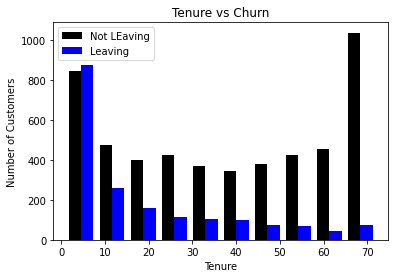

In [17]:
plt.hist([tenure_churn_no,tenure_churn_yes],color=['black','blue'],label=['Not LEaving','Leaving'])
plt.title('Tenure vs Churn')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

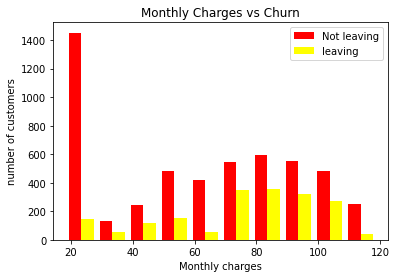

In [18]:
mc_churn_no = df[df.Churn == 'No'].MonthlyCharges
mc_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.hist([mc_churn_no,mc_churn_yes],color= ['red','yellow'],label=['Not leaving','leaving'])
plt.legend()
plt.title('Monthly Charges vs Churn')
plt.xlabel('Monthly charges')
plt.ylabel('number of customers')
plt.show()

In [19]:
def print_unique_values(df):
    for columns in df:
        if df[columns].dtypes == 'object':
            print(f'{columns}:{df[columns].unique()}')

In [20]:
print_unique_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [21]:
df.replace('No internet service','No',inplace = True)

In [22]:
df.replace('No phone service','No',inplace = True)

In [23]:
print_unique_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [24]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection'
                 ,'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [25]:
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [26]:
print_unique_values(df)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [27]:
df['gender'].replace({'Female':0,'Male':1},inplace = True)

In [28]:
df1 = pd.get_dummies(data=df,columns =['InternetService','Contract','PaymentMethod'])


In [29]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [30]:
sc = MinMaxScaler()

In [31]:
df1.shape

(7032, 27)

In [32]:
scale = ['tenure','MonthlyCharges','TotalCharges']

In [33]:
df1[scale] = sc.fit_transform(df1[scale])

In [34]:
df1.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4632,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5845,0,0,0,0,0.028169,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [36]:
x = df1.drop(columns='Churn',axis='columns')
y = df1['Churn']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [38]:
x_train.shape

(5625, 26)

In [39]:
x_test.shape

(1407, 26)

In [40]:
import tensorflow as tf
from tensorflow import keras

In [44]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape = (26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train,epochs = 200)

Epoch 1/200
176/176 [==============================] - 0s 790us/step - loss: 0.5414 - accuracy: 0.7076
Epoch 2/200
176/176 [==============================] - 0s 835us/step - loss: 0.4363 - accuracy: 0.7936
Epoch 3/200
176/176 [==============================] - 0s 915us/step - loss: 0.4252 - accuracy: 0.7973
Epoch 4/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8011
Epoch 5/200
176/176 [==============================] - 0s 886us/step - loss: 0.4187 - accuracy: 0.8007
Epoch 6/200
176/176 [==============================] - 0s 835us/step - loss: 0.4165 - accuracy: 0.8021
Epoch 7/200
176/176 [==============================] - 0s 852us/step - loss: 0.4149 - accuracy: 0.8018
Epoch 8/200
176/176 [==============================] - 0s 892us/step - loss: 0.4135 - accuracy: 0.8041
Epoch 9/200
176/176 [==============================] - 0s 875us/step - loss: 0.4117 - accuracy: 0.8028
Epoch 10/200
176/176 [==============================] - 0s 886us/step - los

176/176 [==============================] - 0s 915us/step - loss: 0.3746 - accuracy: 0.8235
Epoch 80/200
176/176 [==============================] - 0s 892us/step - loss: 0.3750 - accuracy: 0.8226
Epoch 81/200
176/176 [==============================] - 0s 892us/step - loss: 0.3735 - accuracy: 0.8251
Epoch 82/200
176/176 [==============================] - 0s 886us/step - loss: 0.3734 - accuracy: 0.8233
Epoch 83/200
176/176 [==============================] - 0s 926us/step - loss: 0.3730 - accuracy: 0.8233
Epoch 84/200
176/176 [==============================] - 0s 903us/step - loss: 0.3723 - accuracy: 0.8254
Epoch 85/200
176/176 [==============================] - 0s 989us/step - loss: 0.3725 - accuracy: 0.8235
Epoch 86/200
176/176 [==============================] - 0s 983us/step - loss: 0.3715 - accuracy: 0.8240
Epoch 87/200
176/176 [==============================] - 0s 903us/step - loss: 0.3710 - accuracy: 0.8229
Epoch 88/200
176/176 [==============================] - 0s 886us/step - loss:

Epoch 157/200
176/176 [==============================] - 0s 881us/step - loss: 0.3492 - accuracy: 0.8311
Epoch 158/200
176/176 [==============================] - 0s 903us/step - loss: 0.3499 - accuracy: 0.8334
Epoch 159/200
176/176 [==============================] - 0s 898us/step - loss: 0.3494 - accuracy: 0.8348
Epoch 160/200
176/176 [==============================] - 0s 960us/step - loss: 0.3496 - accuracy: 0.8320
Epoch 161/200
176/176 [==============================] - 0s 960us/step - loss: 0.3491 - accuracy: 0.8313
Epoch 162/200
176/176 [==============================] - 0s 983us/step - loss: 0.3489 - accuracy: 0.8318
Epoch 163/200
176/176 [==============================] - 0s 909us/step - loss: 0.3480 - accuracy: 0.8315
Epoch 164/200
176/176 [==============================] - 0s 915us/step - loss: 0.3482 - accuracy: 0.8318
Epoch 165/200
176/176 [==============================] - 0s 886us/step - loss: 0.3477 - accuracy: 0.8313
Epoch 166/200
176/176 [==============================] 

In [45]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 773us/step - loss: 0.5010 - accuracy: 0.7761


[0.5010040998458862, 0.7761194109916687]

In [46]:
yp = model.predict(x_test)

In [47]:
yp[:5]

array([[0.14820999],
       [0.0055427 ],
       [0.10438699],
       [0.860835  ],
       [0.878445  ]], dtype=float32)

In [48]:
y_test[:5]

5561    0
5814    0
2645    0
3983    1
6438    1
Name: Churn, dtype: int64

In [49]:
y_pred = []
for i in yp:
    if i > 0.50:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [50]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1038
           1       0.59      0.46      0.52       369

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



In [53]:
y_test.value_counts()

0    1038
1     369
Name: Churn, dtype: int64

Text(69.0, 0.5, 'Test')

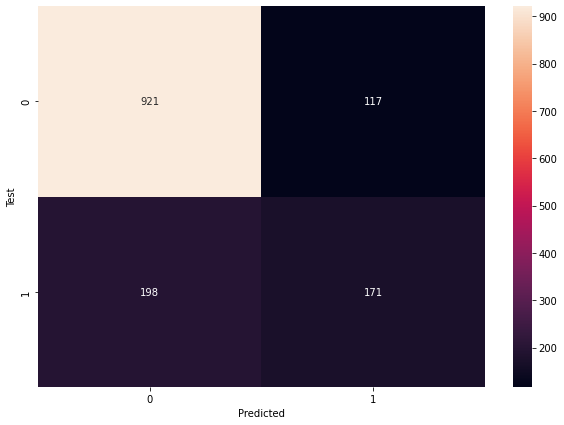

In [54]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Test')
